In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Going through the different csvs to see what we're working with:

In [2]:
games = pd.read_csv('data/games.csv')

In [5]:
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gameId           122 non-null    int64 
 1   season           122 non-null    int64 
 2   week             122 non-null    int64 
 3   gameDate         122 non-null    object
 4   gameTimeEastern  122 non-null    object
 5   homeTeamAbbr     122 non-null    object
 6   visitorTeamAbbr  122 non-null    object
dtypes: int64(3), object(4)
memory usage: 6.8+ KB


,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL
1,2021091200,2021,1,09/12/2021,13:00:00,ATL,PHI
2,2021091201,2021,1,09/12/2021,13:00:00,BUF,PIT
3,2021091202,2021,1,09/12/2021,13:00:00,CAR,NYJ
4,2021091203,2021,1,09/12/2021,13:00:00,CIN,MIN


Games doesn't seem very useful...

In [6]:
players = pd.read_csv('data/players.csv')

In [7]:
players.info()
players.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679 entries, 0 to 1678
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   nflId             1679 non-null   int64 
 1   height            1679 non-null   object
 2   weight            1679 non-null   int64 
 3   birthDate         1447 non-null   object
 4   collegeName       1455 non-null   object
 5   officialPosition  1679 non-null   object
 6   displayName       1679 non-null   object
dtypes: int64(2), object(5)
memory usage: 91.9+ KB


,nflId,height,weight,birthDate,collegeName,officialPosition,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick


Can use this for name/id, height, weight, age and position - not sure how useful college is...

In [8]:
plays = pd.read_csv('data/plays.csv')

In [9]:
plays.info()
plays.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8558 entries, 0 to 8557
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  8558 non-null   int64  
 1   playId                  8558 non-null   int64  
 2   playDescription         8558 non-null   object 
 3   quarter                 8558 non-null   int64  
 4   down                    8558 non-null   int64  
 5   yardsToGo               8558 non-null   int64  
 6   possessionTeam          8558 non-null   object 
 7   defensiveTeam           8558 non-null   object 
 8   yardlineSide            8433 non-null   object 
 9   yardlineNumber          8558 non-null   int64  
 10  gameClock               8558 non-null   object 
 11  preSnapHomeScore        8558 non-null   int64  
 12  preSnapVisitorScore     8558 non-null   int64  
 13  passResult              8558 non-null   object 
 14  penaltyYards            756 non-null    

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
0,2021090900,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,...,NaN,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man
1,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,DAL,TB,DAL,2,...,NaN,108.0,EMPTY,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 4 LB, 3 DB",TRADITIONAL,0,Cover-3,Zone
2,2021090900,187,(12:23) (Shotgun) D.Prescott pass short middle...,1,2,6,DAL,TB,DAL,34,...,NaN,76.0,SHOTGUN,"0 RB, 2 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0,Cover-3,Zone
3,2021090900,282,(9:56) D.Prescott pass incomplete deep left to...,1,1,10,DAL,TB,TB,39,...,NaN,49.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,1,Cover-3,Zone
4,2021090900,349,(9:46) (Shotgun) D.Prescott pass incomplete sh...,1,3,15,DAL,TB,TB,44,...,NaN,54.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"3 DL, 4 LB, 4 DB",TRADITIONAL,0,Cover-3,Zone


These all appear to be passing plays - the runs have already been removed.

In [10]:
scout_data = pd.read_csv('data/pffScoutingData.csv')

In [14]:
scout_data.info()
scout_data.head(23)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188254 entries, 0 to 188253
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   gameId                  188254 non-null  int64  
 1   playId                  188254 non-null  int64  
 2   nflId                   188254 non-null  int64  
 3   pff_role                188254 non-null  object 
 4   pff_positionLinedUp     188254 non-null  object 
 5   pff_hit                 94127 non-null   float64
 6   pff_hurry               94127 non-null   float64
 7   pff_sack                94127 non-null   float64
 8   pff_beatenByDefender    48087 non-null   float64
 9   pff_hitAllowed          48087 non-null   float64
 10  pff_hurryAllowed        48087 non-null   float64
 11  pff_sackAllowed         48087 non-null   float64
 12  pff_nflIdBlockedPlayer  46526 non-null   float64
 13  pff_blockType           47904 non-null   object 
 14  pff_backFieldBlock  

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
0,2021090900,97,25511,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021090900,97,35481,Pass Route,TE-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021090900,97,35634,Pass Route,LWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021090900,97,39985,Pass Route,HB-R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021090900,97,40151,Pass Block,C,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44955.0,SW,0.0
5,2021090900,97,41233,Pass Route,RWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2021090900,97,41263,Pass Rush,LEO,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2021090900,97,42377,Pass Block,LT,NaN,NaN,NaN,0.0,0.0,1.0,0.0,42403.0,PP,0.0
8,2021090900,97,42403,Pass Rush,ROLB,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021090900,97,42404,Pass Block,LG,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44955.0,PP,0.0


Looks like every play (passing play) has all 22 positions covered.

In [15]:
w1 = pd.read_csv('data/week1.csv')

In [16]:
w1.info()
w1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118122 entries, 0 to 1118121
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   gameId         1118122 non-null  int64  
 1   playId         1118122 non-null  int64  
 2   nflId          1069508 non-null  float64
 3   frameId        1118122 non-null  int64  
 4   time           1118122 non-null  object 
 5   jerseyNumber   1069508 non-null  float64
 6   team           1118122 non-null  object 
 7   playDirection  1118122 non-null  object 
 8   x              1118122 non-null  float64
 9   y              1118122 non-null  float64
 10  s              1118122 non-null  float64
 11  a              1118122 non-null  float64
 12  dis            1118122 non-null  float64
 13  o              1069508 non-null  float64
 14  dir            1069508 non-null  float64
 15  event          1118122 non-null  object 
dtypes: float64(9), int64(3), object(4)
memory usage: 136.5

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,None
1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,None
2,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,None
3,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,None
4,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,None


This has some pretty amazing player tracking data.

In [27]:
tb1w1 = w1[w1.gameId == 2021090900][w1.playId == 97][w1.jerseyNumber == 12.0]

/var/folders/nw/8yyyyp8n70vbplhdsylyqs8c0000gn/T/ipykernel_6719/2052821705.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tb1w1 = w1[w1.gameId == 2021090900][w1.playId == 97][w1.jerseyNumber == 12.0]


<AxesSubplot:xlabel='x', ylabel='y'>

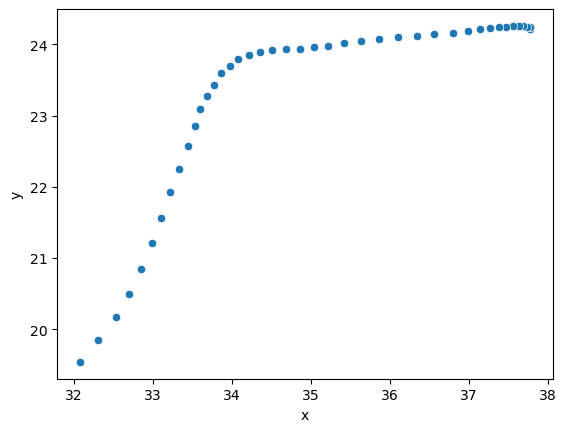

In [28]:
sns.scatterplot(data=tb1w1, x = 'x', y='y')

Above is the dropback pattern of the quarterback.

#### Metric to think about and way to analyze - see where linemen converge.
##### Other way of looking at this - set play to outcome sack or not (could also do multiple outcomes) and create an ML analysis based on the players.  Need things like blitz, time the qbheld the ball, etc.  Remove trick plays.

### TODOs

1. Isolate all linemen.
2. Identify best and worst blockers by collective sacks given up, etc.
3. Try to capture team statistical info to merge into analysis.
4. Try to capture opponent player info to merge into analysis.
5. Metric track and strategy track?